In [28]:
import torch
# Set default tensor type to float64
torch.set_default_dtype(torch.float64)
from botorch.test_functions.synthetic import Shekel

In [29]:
shekel_function = Shekel(m=5)
def objective_function(X):
    return shekel_function(10*X)

In [30]:
objective_function(torch.tensor([0.4,0.4,0.4,0.4]))

tensor(-10.1532)

In [12]:
dim = 4
bounds = torch.stack([torch.zeros(dim), torch.ones(dim)])
seed = 42
maximize = False
num_iterations = 30

In [7]:
from pandora_bayesopt.bayesianoptimizer import BayesianOptimizer
from botorch.utils.sampling import draw_sobol_samples
from botorch.acquisition import ExpectedImprovement
from pandora_bayesopt.acquisition import GittinsIndex

In [21]:
torch.manual_seed(seed)

init_x = draw_sobol_samples(bounds=bounds, n=1, q=2*dim+1, seed=seed).squeeze(0)

# Create an instance of BayesianOptimizer
EI_optimizer = BayesianOptimizer(objective=objective_function, dim=dim, maximize=maximize, initial_points=init_x, input_standardize=True)
# Run the optimization
EI_optimizer.run(num_iterations=num_iterations, acquisition_function_class=ExpectedImprovement)
EI_best_history = EI_optimizer.get_best_history()

Acq value: tensor(0.0138)
Iteration 0, New point: [0.48636519 0.44668532 0.32707262 0.25816484], New value: -0.396017860557056
Best observed value: -0.4184782616089892
Cumulative cost: 1.0

Acq value: tensor(0.0096)
Iteration 1, New point: [0.53804215 0.43772234 0.44257153 0.32080483], New value: -0.4843448088121381
Best observed value: -0.4843448088121381
Cumulative cost: 2.0

Acq value: tensor(0.0112)
Iteration 2, New point: [0.581502   0.48833752 0.47729044 0.28250391], New value: -0.3049895498230909
Best observed value: -0.4843448088121381
Cumulative cost: 3.0

Acq value: tensor(0.0395)
Iteration 3, New point: [0.508647   0.43326271 0.45876545 0.35462998], New value: -0.6757583016200994
Best observed value: -0.6757583016200994
Cumulative cost: 4.0

Acq value: tensor(0.0690)
Iteration 4, New point: [0.47837151 0.41926588 0.45823946 0.38621506], New value: -1.069010240909801
Best observed value: -1.069010240909801
Cumulative cost: 5.0

Acq value: tensor(0.1144)
Iteration 5, New point

In [22]:
torch.manual_seed(seed)

init_x = draw_sobol_samples(bounds=bounds, n=1, q=2*dim+1, seed=seed).squeeze(0)

# Example usage with GittinsIndex
GIfree_optimizer = BayesianOptimizer(objective=objective_function, dim=dim, maximize=maximize, initial_points=init_x, input_standardize=True)
GIfree_optimizer.run(num_iterations=num_iterations, acquisition_function_class=GittinsIndex)
GIfree_best_history = GIfree_optimizer.get_best_history()

current lambda: 0.0068898006269618
Acq value: tensor(0.4422)
Iteration 0, New point: [0.46967981 0.45410022 0.29619691 0.2413673 ], New value: -0.3380962144172505
Best observed value: -0.4184782616089892
Cumulative cost: 1.0

current lambda: 0.0068898006269618
Acq value: tensor(0.4290)
Iteration 1, New point: [0.54860153 0.4230295  0.4695456  0.33427818], New value: -0.4563665912077054
Best observed value: -0.4563665912077054
Cumulative cost: 2.0

current lambda: 0.004145747207292404
Acq value: tensor(0.4766)
Iteration 2, New point: [0.59685683 0.45815986 0.51198791 0.22880219], New value: -0.23586724997868416
Best observed value: -0.4563665912077054
Cumulative cost: 3.0

current lambda: 0.004145747207292404
Acq value: tensor(0.5103)
Iteration 3, New point: [0.50215218 0.43429865 0.38826055 0.38940772], New value: -0.9402080568790829
Best observed value: -0.9402080568790829
Cumulative cost: 4.0

current lambda: 0.004145747207292404
Acq value: tensor(1.1664)
Iteration 4, New point: [0.4

In [23]:
torch.manual_seed(seed)

init_x = draw_sobol_samples(bounds=bounds, n=1, q=2*dim+1, seed=seed).squeeze(0)

# Example usage with GittinsIndex
GIlmbda_optimizer = BayesianOptimizer(objective=objective_function, dim=dim, maximize=maximize, initial_points=init_x, input_standardize=True)
GIlmbda_optimizer.run(num_iterations=num_iterations, acquisition_function_class=GittinsIndex, lmbda=0.0001)
GIlmbda_best_history = GIlmbda_optimizer.get_best_history()

Acq value: tensor(0.5762)
Iteration 0, New point: [0.41919004 0.46110723 0.19108818 0.19063254], New value: -0.212289939482801
Best observed value: -0.4184782616089892
Cumulative cost: 1.0

Acq value: tensor(0.5543)
Iteration 1, New point: [0.56302644 0.48383176 0.47738962 0.26297417], New value: -0.3023809887241545
Best observed value: -0.4184782616089892
Cumulative cost: 2.0

Acq value: tensor(0.5299)
Iteration 2, New point: [0.41740574 0.39412126 0.39526825 0.46910282], New value: -1.8008653508980608
Best observed value: -1.8008653508980608
Cumulative cost: 3.0

Acq value: tensor(2.5733)
Iteration 3, New point: [0.25935893 0.40984188 0.14694862 0.49291155], New value: -0.2438108509699617
Best observed value: -1.8008653508980608
Cumulative cost: 4.0

Acq value: tensor(2.4936)
Iteration 4, New point: [0.42531789 0.53782566 0.54977639 0.51462493], New value: -0.498463628927773
Best observed value: -1.8008653508980608
Cumulative cost: 5.0

Acq value: tensor(2.4240)
Iteration 5, New poin

Text(0.5, 1.0, 'Performance of EI vs Gittins on Shekel5')

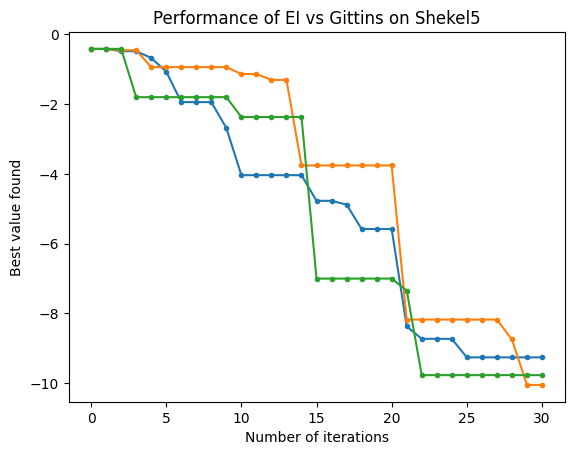

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(num_iterations+1), EI_best_history,'.-')
plt.plot(range(num_iterations+1), GIfree_best_history,'.-')
plt.plot(range(num_iterations+1), GIlmbda_best_history,'.-')
plt.xlabel('Number of iterations')
plt.ylabel('Best value found')
plt.title("Performance of EI vs Gittins on Shekel5")